# Multiple Linear Regression Analysis

## problem statement
- predict sales for a company by analysing the TV, radio and newspaper advertisement budget
- sales here will be considered as dependent variable

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Exploratory data Analysis

In [3]:
# get general information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# get statistical information
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# check if there are any NA (missing) values
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
# get all the columns present in the dataframe
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
# correlation analysis
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

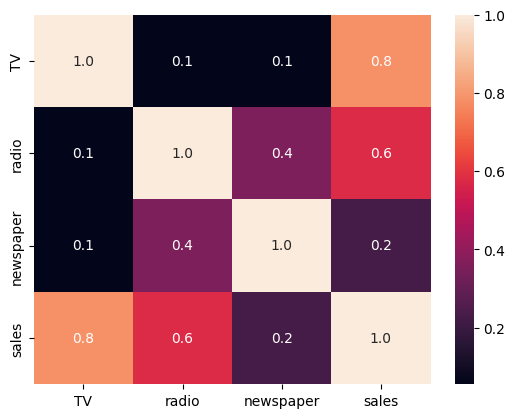

In [12]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")

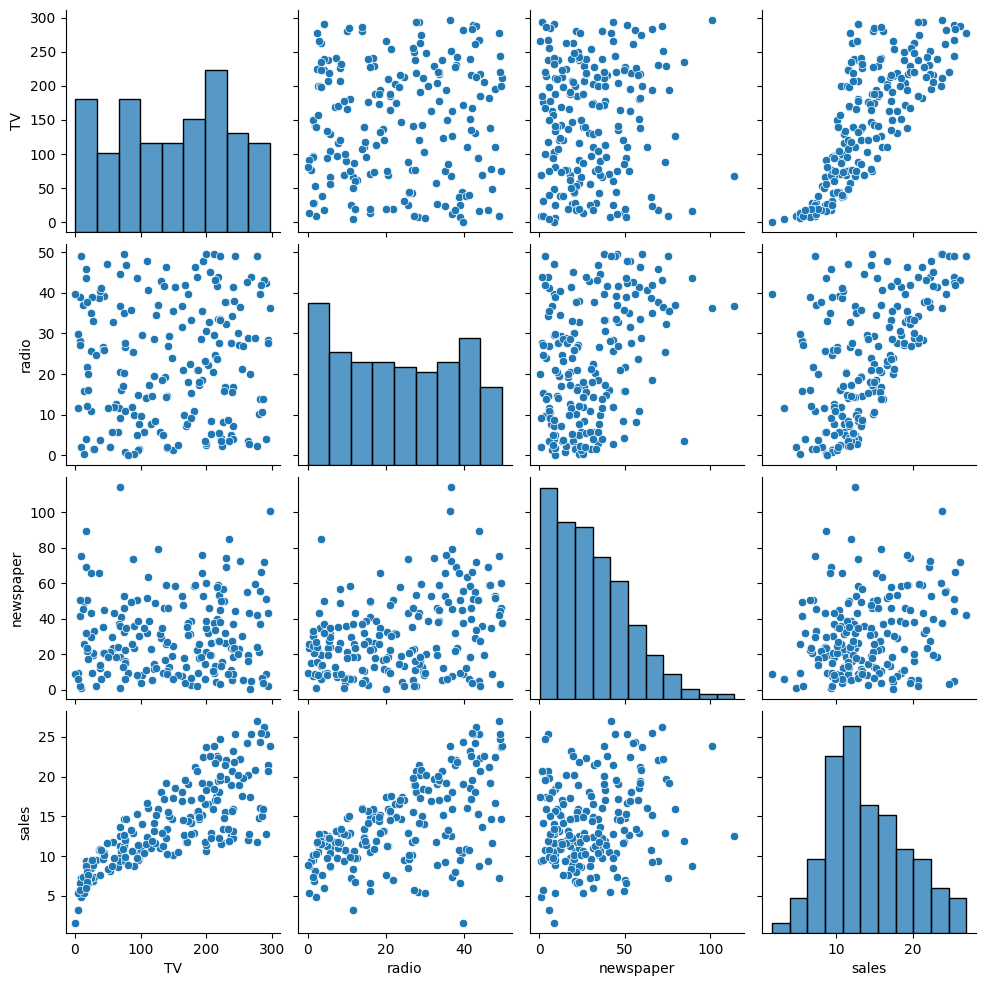

In [14]:
# get plot of every variable with every another variable in the df
sns.pairplot(df)

### pre-processing the data

In [15]:
# drop the unwanted column (newspaper)
df.drop('newspaper', axis=1, inplace=True)

In [17]:
df.columns

Index(['TV', 'radio', 'sales'], dtype='object')

### split the data

In [18]:
# select x and y
x = df.drop('sales', axis=1)
y = df['sales']

### build the model

In [19]:
from sklearn.linear_model import LinearRegression

# create an empty model
model = LinearRegression()

# train the model
model.fit(x, y)

LinearRegression()

### analysis the model

In [20]:
model.coef_

array([0.04575482, 0.18799423])

In [21]:
model.intercept_

2.9210999124051362

In [22]:
# y = b1x1 + b2x2 + b0
# y = 0.04575482 * TV + 0.18799423 * radio + 2.9210999124051362

In [25]:
prediction = model.predict([[200, 40]])
print(f"Company with $200m TV budget and $40m radio budget can expect ${prediction[0]} sales")

Company with $200m TV budget and $40m radio budget can expect $19.591831997432735 sales


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
prediction = (0.04575482 * 200) + (0.18799423 * 40) + 2.9210999124051362
prediction

19.591833112405137